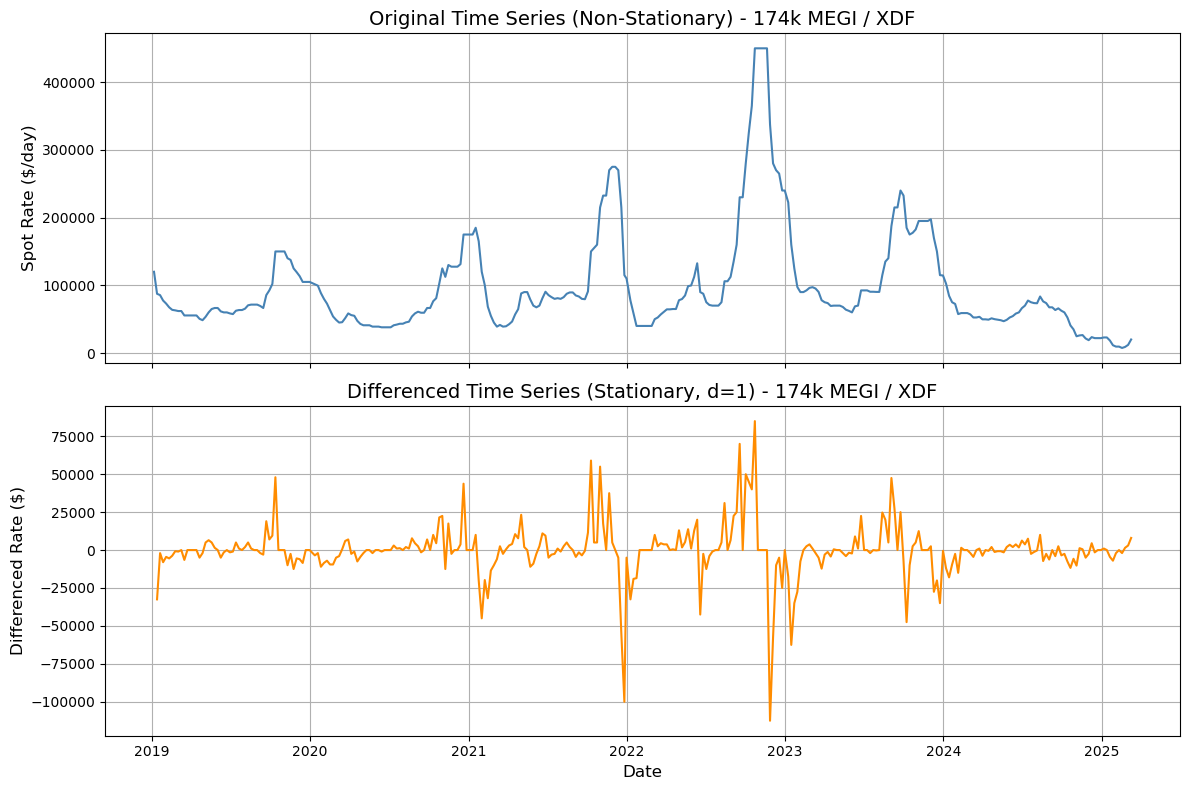

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('Spot charter rates - Fearnley LNG.xlsx')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the series for "174k MEGI / XDF"
series = df.set_index('Date')['174k MEGI / XDF'].dropna()

# Differencing (d=1) to achieve stationarity
series_diff = series.diff().dropna()

# Plot original vs differenced series
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Original series (Non-Stationary)
ax[0].plot(series, color='steelblue')
ax[0].set_title('Original Time Series (Non-Stationary) - 174k MEGI / XDF', fontsize=14)
ax[0].set_ylabel('Spot Rate ($/day)', fontsize=12)
ax[0].grid(True)

# Differenced series (Stationary)
ax[1].plot(series_diff, color='darkorange')
ax[1].set_title('Differenced Time Series (Stationary, d=1) - 174k MEGI / XDF', fontsize=14)
ax[1].set_ylabel('Differenced Rate ($)', fontsize=12)
ax[1].set_xlabel('Date', fontsize=12)
ax[1].grid(True)

plt.tight_layout()
plt.show()


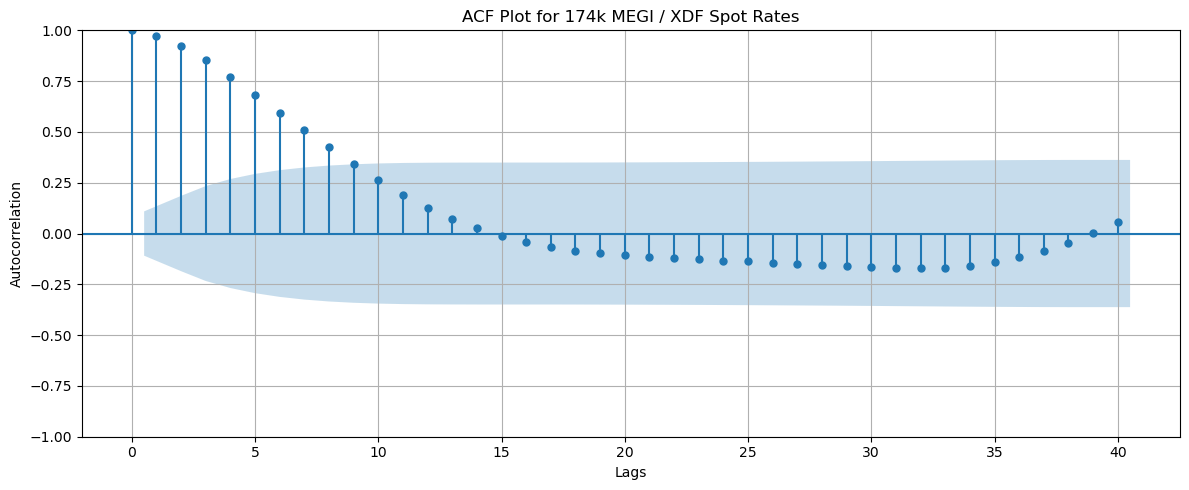

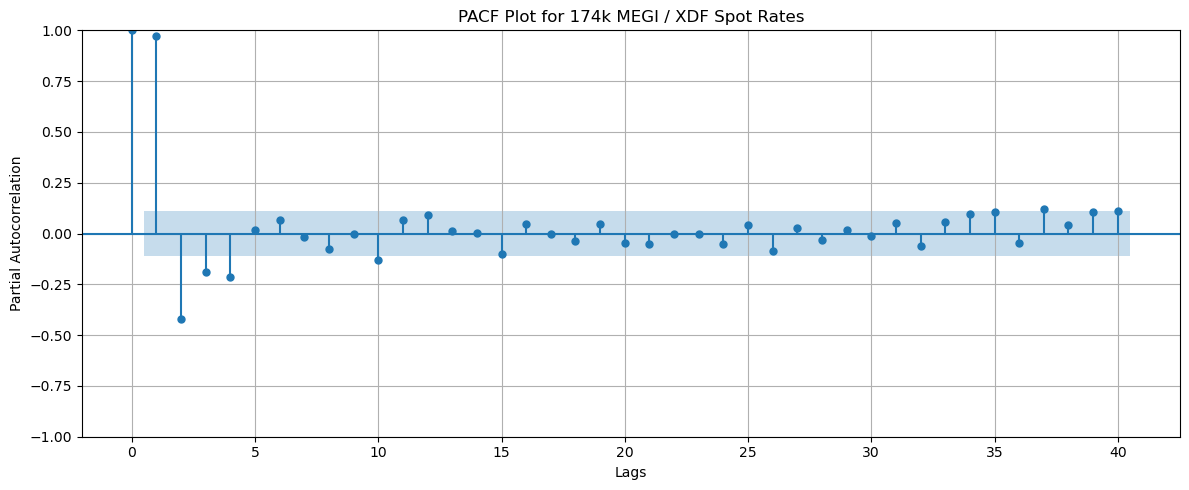

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load data
file_path = "Spot charter rates - Fearnley LNG.xlsx"
df = pd.read_excel(file_path)

# Clean and convert the date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Extracting the relevant series for 174k MEGI / XDF and dropping NA
megi_xdf_series = df.set_index('Date')['174k MEGI / XDF'].dropna()

# Plot ACF
plt.figure(figsize=(12, 5))
plot_acf(megi_xdf_series, lags=40, ax=plt.gca())
plt.title('ACF Plot for 174k MEGI / XDF Spot Rates')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot PACF
plt.figure(figsize=(12, 5))
plot_pacf(megi_xdf_series, lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF Plot for 174k MEGI / XDF Spot Rates')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()


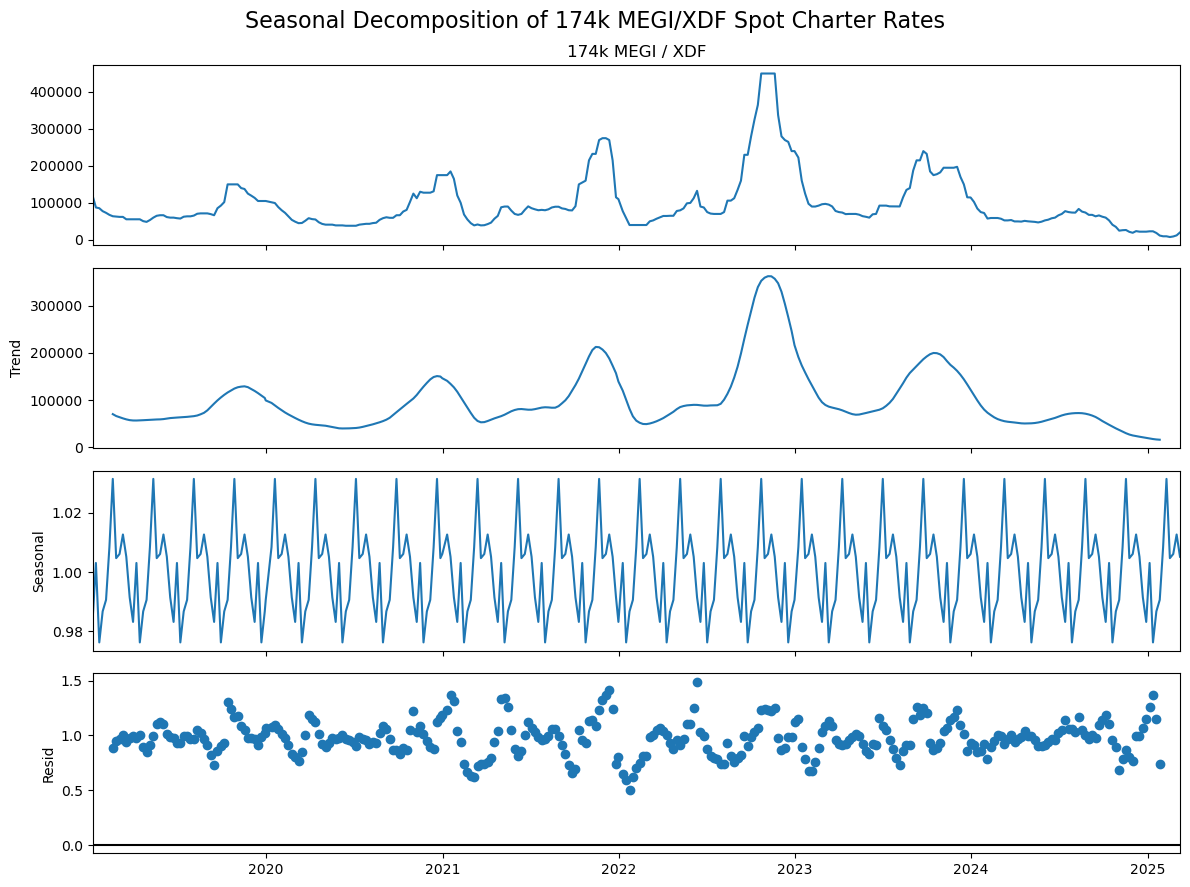

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_excel('Spot charter rates - Fearnley LNG.xlsx')

# Convert date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
df.set_index('Date', inplace=True)

# Extract the series for "174k MEGI / XDF"
megi_xdf_series = df['174k MEGI / XDF'].dropna()

# Perform seasonal decomposition (assuming yearly seasonality with 12 months)
decomposition = seasonal_decompose(megi_xdf_series, model='multiplicative', period=12)

# Plot seasonal decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 9)
fig.suptitle('Seasonal Decomposition of 174k MEGI/XDF Spot Charter Rates', fontsize=16)

plt.tight_layout()
plt.show()
